In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import GlobalPhaseGate, PhaseOracle
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import array_to_latex, plot_histogram

from sympy.parsing.sympy_parser import parse_expr
from sympy.logic.inference import satisfiable

import numpy as np

<img src="../images/grover.png" alt="Alt text" width="500" height="400">

<img src="../images/grover_geometric.png" alt="Alt text" width="250" height="250">

## Phase oracle
- [PhaseOracle](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseOracle)

In [2]:
#expression = '(a | b) & (~a | c) & (~c | ~d) & (~b | d) & (~b | c)'
expression = '(a | b | c) & (~a | ~b) & (~a | ~c) & (~b | ~c)'
oracle = PhaseOracle(expression)
oracle_gate = oracle.to_gate()
oracle_gate.name = 'Oracle'

In [3]:
n_qubits = oracle.num_qubits

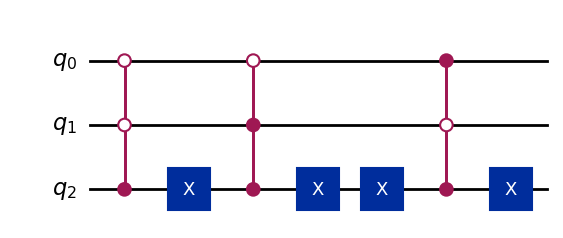

In [4]:
oracle.draw("mpl")

## Phase
- $\ket{0} \to \ket{0}$
- $\ket{x} \to -\ket{x}$ for $x>0$

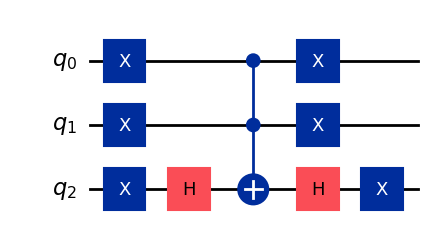

In [5]:
qc = QuantumCircuit(n_qubits)

qc.x(range(n_qubits))
qc.h(n_qubits-1)
qc.mcx(list(range(n_qubits-1)), n_qubits-1)
qc.h(n_qubits-1)
qc.x(range(n_qubits))
qc.append(GlobalPhaseGate(np.pi), 0)

phase_gate = qc.to_gate()
phase_gate.name = 'Phase'

qc.draw("mpl")

In [6]:
state = Statevector(qc)
array_to_latex(state, max_size=20)

<IPython.core.display.Latex object>

## Grover

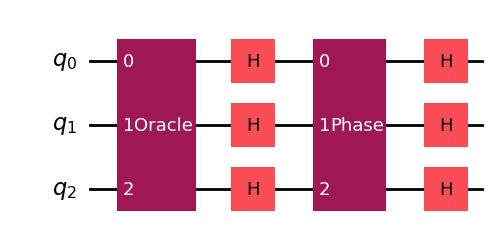

In [7]:
qc = QuantumCircuit(n_qubits)
qc.append(oracle_gate, list(range(n_qubits)))
qc.h(list(range(n_qubits)))
qc.append(phase_gate, list(range(n_qubits)))
qc.h(list(range(n_qubits)))
grover_gate = qc.to_gate()
grover_gate.name = 'Grover'

qc.draw("mpl")

## Iterations

<img src="../images/grover_performance.png" alt="Alt text" width="500" height="250">

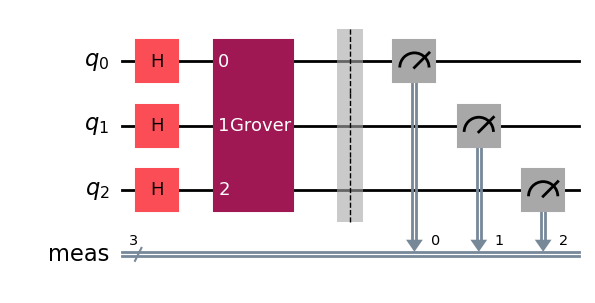

In [8]:
qc = QuantumCircuit(n_qubits)
qc.h(list(range(n_qubits)))

qc.append(grover_gate, list(range(n_qubits)))
#qc.append(grover_gate, list(range(n_qubits)))

qc_measured = qc.measure_all(inplace=False)
qc_measured.draw("mpl")

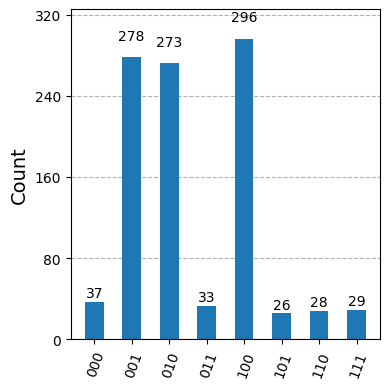

In [9]:
sampler = StatevectorSampler()
job = sampler.run([qc_measured], shots=1000)
result = job.result()
counts = result[0].data['meas'].get_counts()
plot_histogram(counts, figsize=(4,4))

In [10]:
expression

'(a | b | c) & (~a | ~b) & (~a | ~c) & (~b | ~c)'

In [11]:
expr = parse_expr(expression)
models = satisfiable(expr, all_models=True)
list(models)

[{b: True, a: False, c: False},
 {c: True, a: False, b: False},
 {a: True, b: False, c: False}]

In [12]:
M = 1
N =2**n_qubits
theta = np.arcsin(2*np.sqrt(2*(N-M))/N)
np.arccos(np.sqrt(M/N))/theta

np.float64(1.0)